# Importações Essenciais

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy import Function, simplify, Matrix, collect, factor, Wild
from sympy import sin as s, cos as c, symbols as symbol, diff as df
init_vprinting()

In [80]:
t, g, pi = symbol('t'), symbol('g'), symbol('\\pi')
t0, t1, t2, t3 = Function('\\theta_0')(t), Function('\\theta_1')(t), Function('\\theta_2')(t),Function('\\theta_3')(t)
L1, L2, L3 = symbol('L_1'),symbol('L_2'), symbol('L_3')
m1, m2, m3 = symbol('m_1'),symbol('m_2'), symbol('m_3')

# Cinemática Direta

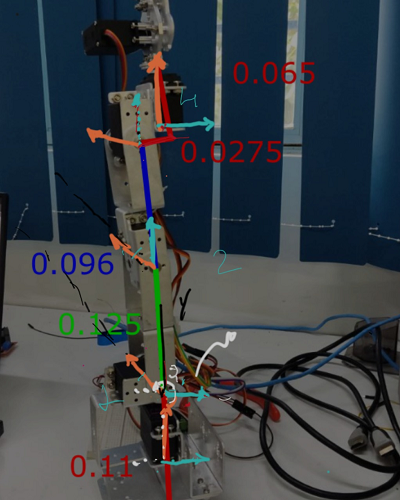

## Modelagem DH

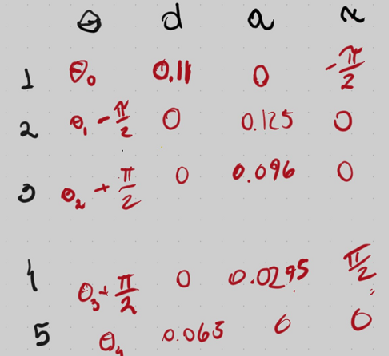

## Matriz de Transformação Homogênea

\begin{equation} T_0^1 = \left(\begin{matrix}
\cos\left(\theta_0\right) & 0 & -\sin\left(\theta_0\right) & 0 \\
\sin\left(\theta_0\right) & 0 & \cos\left(\theta_0\right) & 0 \\
0 & -1 & 0 & 0.11 \\
0 & 0 & 0 & 1
\end{matrix}\right) \end{equation}

  


\begin{equation} T_1^2 = \left(\begin{matrix}
cos(\theta_1-\frac{\pi}{2})& -sen(\theta_1-\frac{\pi}{2})& 0& 0.125*cos(\theta_1-\frac{\pi}{2})\\
         sen(\theta_1-\frac{\pi}{2})& cos(\theta_1-\frac{\pi}{2})& 0& 0.125*sen(\theta_1-\frac{\pi}{2})\\
         0& 0& 1& 0\\
         0&  0&  0& 1\\
\end{matrix}\right) \end{equation}

  


\begin{equation} T_2^3 = \left(\begin{matrix}
cos(\theta_2+\frac{\pi}{2}) & -sen(\theta_2+\frac{\pi}{2})& 0 & 0.096*cos(\theta_2+\frac{\pi}{2})\\
         sen(\theta_2+\frac{\pi}{2})& cos(\theta_2+\frac{\pi}{2})& 0& 0.096*sen(\theta_2+\frac{\pi}{2})\\
0& 0& 1& 0\\
0&  0&  0& 1\\
\end{matrix}\right) \end{equation}


  


\begin{equation} T_3^4 = \left(\begin{matrix}
0& 0& 1 & 0\\
         1 & 0& 0 & 0.0275\\
         0& 1& 0& 0\\
         0&  0&  0& 1\\
\end{matrix}\right) \end{equation} 


\begin{equation} T_4^5 = \left(\begin{matrix}
1&0& 0& 0\\
         0& 1& 0& 0\\
         0& 0& 1& 0.065\\
         0&  0&  0& 1
\end{matrix}\right) \end{equation} 


In [81]:
def MT01(t0):
  mat = [[c(t0), 0, -s(t0), 0],
         [s(t0), 0, c(t0), 0],
         [0, -1, 0, 0.11],
         [0,  0,  0, 1]]
  
  return np.array(mat)

def MT12(t1):
  mat = [[c(t1-(pi/2)),-s(t1-(pi/2)), 0, 0.125*c(t1-(pi/2))],
         [s(t1-(pi/2)), c(t1-(pi/2)), 0, 0.125*s(t1-(pi/2))],
         [0, 0, 1, 0],
         [0,  0,  0, 1]]
  
  return np.array(mat)

def MT23(t2):
  mat = [[c(t2+(pi/2)),-s(t2+(pi/2)), 0, 0.096*c(t2+(pi/2))],
         [s(t2+(pi/2)), c(t2+(pi/2)), 0, 0.096*s(t2+(pi/2))],
         [0, 0, 1, 0],
         [0,  0,  0, 1]]
  
  return np.array(mat)

def MT34(t3):
  mat = [[0, 0, 1, 0],
         [1, 0, 0, 0.0275],
         [0, 1, 0, 0],
         [0,  0,  0, 1]]
  
  return np.array(mat)

def MT45(t4):
  mat = [[1,0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 1, 0.065],
         [0,  0,  0, 1]]
  
  return np.array(mat)

fk = MT01(t0)@MT12(t1)@MT23(t2)@MT34(0)@MT45(0)
print("\nForward Kinematics\n")
Matrix(simplify(fk))


Forward Kinematics



⎡                                                                             
⎢-1.0⋅sin(\theta₁ + \theta₂)⋅cos(\theta₀)  -1.0⋅sin(\theta₀)  1.0⋅cos(\theta₁ 
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢-1.0⋅sin(\theta₁ + \theta₂)⋅sin(\theta₀)  1.0⋅cos(\theta₀)   1.0⋅sin(\theta₀)
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢      -1.0⋅cos(\theta₁ + \theta₂)                 0                -1.0⋅sin(\
⎢                                                                             
⎢                                                                             
⎣                   0                              0

# Jacobiana


## Desse modo, para obter a Jacobiana, basta derivarmos as posições obtidas na matriz de transformação homogênea.

In [82]:
x = 0
y = 1
z = 2

Tx = simplify(fk[x][3])
Ty = simplify(fk[y][3])
Tz = simplify(fk[z][3])

In [83]:
Tx

In [84]:
Ty

In [85]:
Tz

In [86]:
Jacobiana = simplify(Matrix([[df(Tx,t0), df(Tx, t1), df(Tx,t2)],
                    [df(Ty, t0), df(Ty, t1), df(Ty, t2)],
                   [df(Tz, t0), df(Tz, t1), df(Tz, t2)]]))

print("\nJacobiana\n")
Jacobiana


Jacobiana



⎡ ⎛                                          ⎛\pi          ⎞                  
⎢-⎜-0.0275⋅sin(\theta₁ + \theta₂) + 0.125⋅cos⎜─── - \theta₁⎟ + 0.161⋅cos(\thet
⎢ ⎝                                          ⎝ 2           ⎠                  
⎢                                                                             
⎢⎛                                          ⎛\pi          ⎞                   
⎢⎜-0.0275⋅sin(\theta₁ + \theta₂) + 0.125⋅cos⎜─── - \theta₁⎟ + 0.161⋅cos(\theta
⎢⎝                                          ⎝ 2           ⎠                   
⎢                                                                             
⎢                                                                             
⎢                                                   0                         
⎣                                                                             

             ⎞                ⎛           ⎛\pi          ⎞                     
a₁ + \theta₂)⎟⋅sin(\theta₀)  -⎜- 0.125⋅sin⎜─── - \t

# Lagrangiana



---

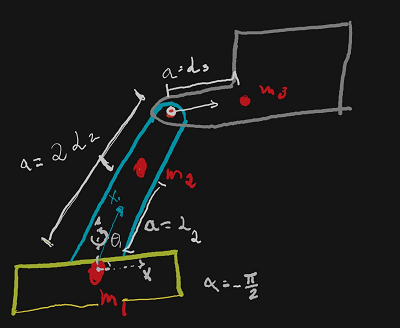

## Modelagem DH com os Centros de Massa

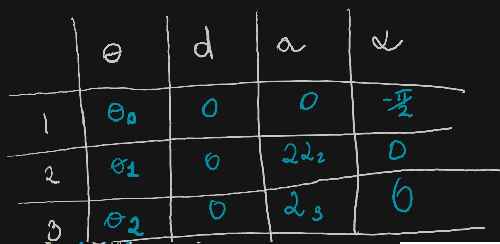

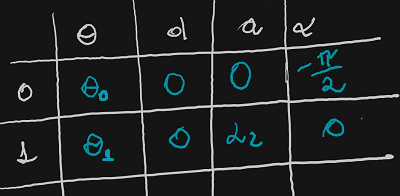

### Posição dos Pontos

In [87]:
P1 = [[0], [0], [0]]
Matrix(P1)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [88]:
P2 = [[L2 * c(t0) * c(t1)],
      [L2 * s(t0) * c(t1)]  ,
      [-L2 * s(t1)]]

print("\nP2\n")
Matrix(P2)


P2



⎡L₂⋅cos(\theta₀)⋅cos(\theta₁)⎤
⎢                            ⎥
⎢L₂⋅sin(\theta₀)⋅cos(\theta₁)⎥
⎢                            ⎥
⎣      -L₂⋅sin(\theta₁)      ⎦

In [89]:
P3 = [[L3 * c(t0) * (c(t1)*c(t2) - s(t1)*s(t2)) + 2*P2[0][0]],
      [L3 * s(t0) * (c(t1)*c(t2) - s(t1)*s(t2)) + 2*P2[1][0]],
      [-L3 * (s(t1)*c(t2) + c(t1)*s(t2)) + 2*P2[2][0]]]

print("\nP3\n")
simplify(Matrix(P3))


P3



⎡(2⋅L₂⋅cos(\theta₁) + L₃⋅cos(\theta₁ + \theta₂))⋅cos(\theta₀)⎤
⎢                                                            ⎥
⎢(2⋅L₂⋅cos(\theta₁) + L₃⋅cos(\theta₁ + \theta₂))⋅sin(\theta₀)⎥
⎢                                                            ⎥
⎣       -2⋅L₂⋅sin(\theta₁) - L₃⋅sin(\theta₁ + \theta₂)       ⎦

### Velocidade dos Pontos

In [90]:
x1_linha , y1_linha, z1_linha = df(P1[0][0],t), df(P1[1][0],t), df(P1[2][0],t)
v1 = Matrix([x1_linha, y1_linha , z1_linha])

print("\nV1\n")
v1


V1



⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [91]:
x2_linha , y2_linha, z2_linha = df(P2[0][0],t), df(P2[1][0],t), df(P2[2][0],t)
v2 = simplify(Matrix([x2_linha, y2_linha, z2_linha]))

print("\nV2\n")
v2


V2



⎡-L₂⋅(sin(\theta₀)⋅cos(\theta₁)⋅\thėta₀ + sin(\theta₁)⋅cos(\theta₀)⋅\thėta₁)⎤
⎢                                                                           ⎥
⎢L₂⋅(-sin(\theta₀)⋅sin(\theta₁)⋅\thėta₁ + cos(\theta₀)⋅cos(\theta₁)⋅\thėta₀)⎥
⎢                                                                           ⎥
⎣                         -L₂⋅cos(\theta₁)⋅\thėta₁                          ⎦

In [92]:
x3_linha , y3_linha, z3_linha = df(P3[0][0],t), df(P3[1][0],t), df(P3[2][0],t)
v3 = simplify(Matrix([x3_linha, y3_linha, z3_linha]))

print("\nV2\n")
v3


V2



⎡-2⋅L₂⋅sin(\theta₀)⋅cos(\theta₁)⋅\thėta₀ - 2⋅L₂⋅sin(\theta₁)⋅cos(\theta₀)⋅\th
⎢                                                                             
⎢-2⋅L₂⋅sin(\theta₀)⋅sin(\theta₁)⋅\thėta₁ + 2⋅L₂⋅cos(\theta₀)⋅cos(\theta₁)⋅\th
⎢                                                                             
⎣                                                          -2⋅L₂⋅cos(\theta₁)⋅

ėta₁ - L₃⋅(\thėta₁ + \thėta₂)⋅sin(\theta₁ + \theta₂)⋅cos(\theta₀) - L₃⋅sin(
                                                                              
ėta₀ - L₃⋅(\thėta₁ + \thėta₂)⋅sin(\theta₁ + \theta₂)⋅sin(\theta₀) + L₃⋅cos(
                                                                              
\thėta₁ - L₃⋅(\thėta₁ + \thėta₂)⋅cos(\theta₁ + \theta₂)                    

\theta₀)⋅cos(\theta₁ + \theta₂)⋅\thėta₀⎤
                                   ⎥
\theta₁ + \theta₂)⋅cos(\theta₀)⋅\thėta₀⎥
                                   ⎥
                                      ⎦

### Lagrangeano

Agora é possível calcular o Lagrangeano do sistema de modo que:

\begin{equation} \frac{d}{dt}\frac{dL}{d\theta'} - \frac{dL}{d\theta}  = Q\end{equation}



Lagrange



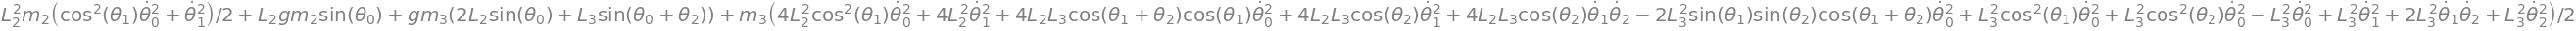

In [93]:
T = (m1/2)*(x1_linha**2 + y1_linha**2 + z1_linha**2)+(m2 / 2) * (x2_linha**2 + y2_linha**2 + z2_linha**2) + (m3 / 2) * (x3_linha**2 + y3_linha**2 + z3_linha**2)
U = -m2 * g * L2 * s(t0) - m3 * g * (L3 * s(t0 + t2) + 2 * L2 * s(t0))
L = T - U

Lagrange = simplify(L)

print("\nLagrange\n")
Lagrange

### Relacionando Torque ao controle das Juntas


Torque Junta 0



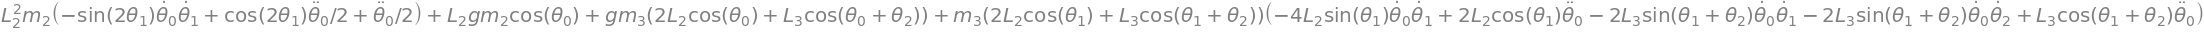

In [94]:
tau0 = df(df(L, df(t0, t)), t) + df(L, t0)
tau0 = simplify(tau0)

print("\nTorque Junta 0\n")
tau0


Torque Junta 1



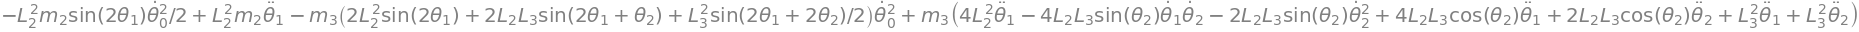

In [95]:
tau1 = df(df(L, df(t1, t)), t) + df(L, t1)
tau1 = simplify(tau1)

print("\nTorque Junta 1\n")
tau1


Torque Junta 2



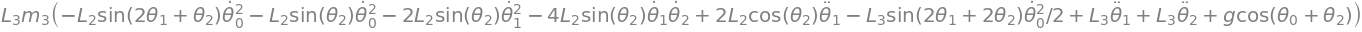

In [96]:
tau2 = df(df(L, df(t2, t)), t) + df(L, t2)
tau2 = simplify(tau2)

print("\nTorque Junta 2\n")
tau2